<a href="https://colab.research.google.com/github/drickkarmokar5776/Hotel_Booking/blob/main/Hotel_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = 'Hotel Bookings (1) (1) (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data['children'].fillna(0, inplace=True)
data['country'].fillna('Unknown', inplace=True)

In [ ]:
data.drop(columns=['agent', 'company'], inplace=True)

In [ ]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

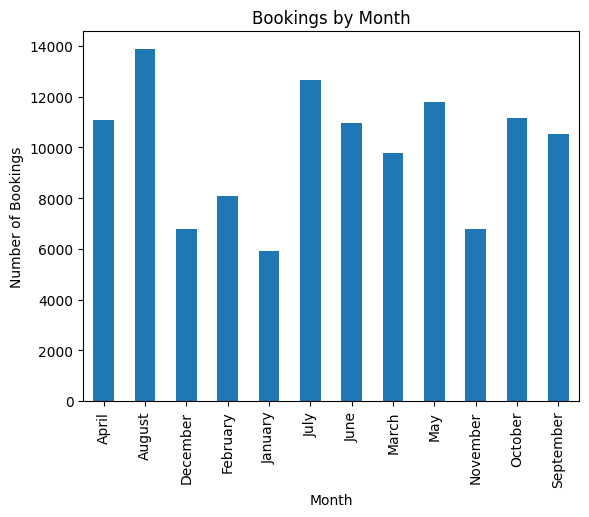

In [ ]:
bookings_by_month = data['arrival_date_month'].value_counts().sort_index()
bookings_by_month.plot(kind='bar', title='Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

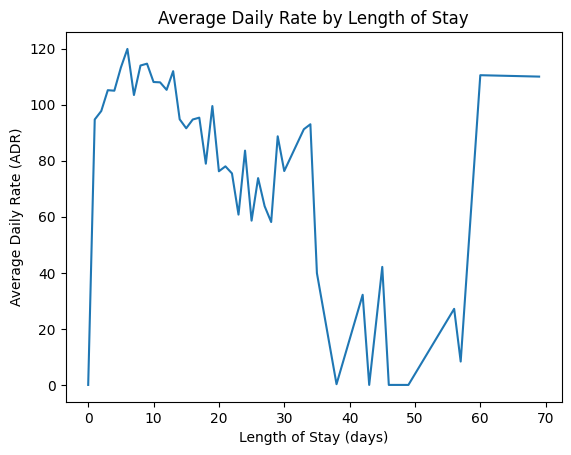

In [ ]:
adr_by_stay = data.groupby('total_stay')['adr'].mean()
adr_by_stay.plot(kind='line', title='Average Daily Rate by Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

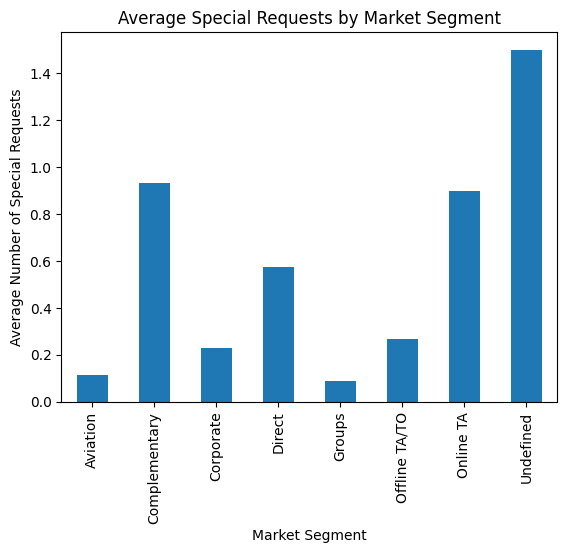

In [ ]:
special_requests_by_market_segment = data.groupby('market_segment')['total_of_special_requests'].mean()
special_requests_by_market_segment.plot(kind='bar', title='Average Special Requests by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Number of Special Requests')
plt.show()

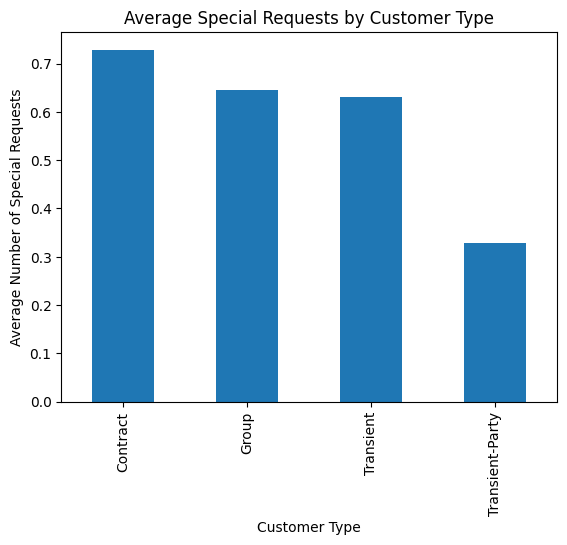

In [ ]:
special_requests_by_customer_type = data.groupby('customer_type')['total_of_special_requests'].mean()
special_requests_by_customer_type.plot(kind='bar', title='Average Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Number of Special Requests')
plt.show()


Average Lead Time: 104.01 days


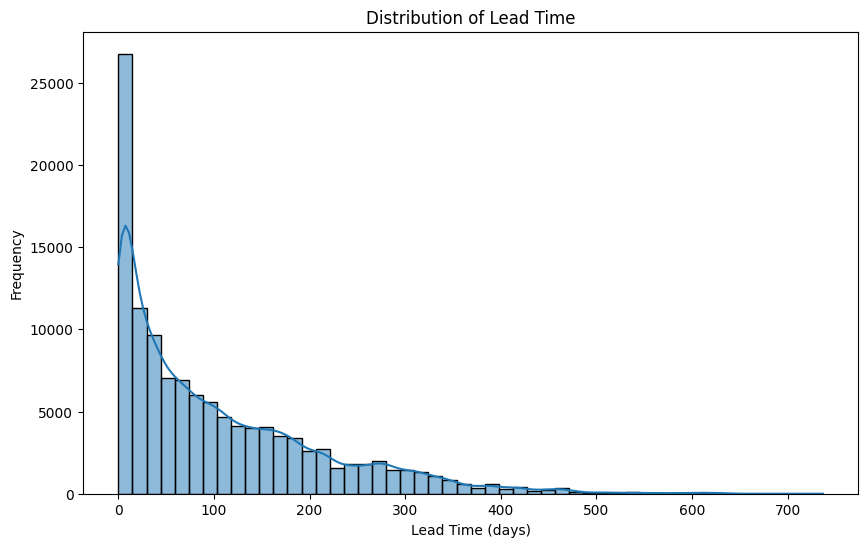

In [ ]:
lead_time_avg = data['lead_time'].mean()
print(f"Average Lead Time: {lead_time_avg:.2f} days")

plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], kde=True, bins=50)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

Cancellation Rate: 37.04%


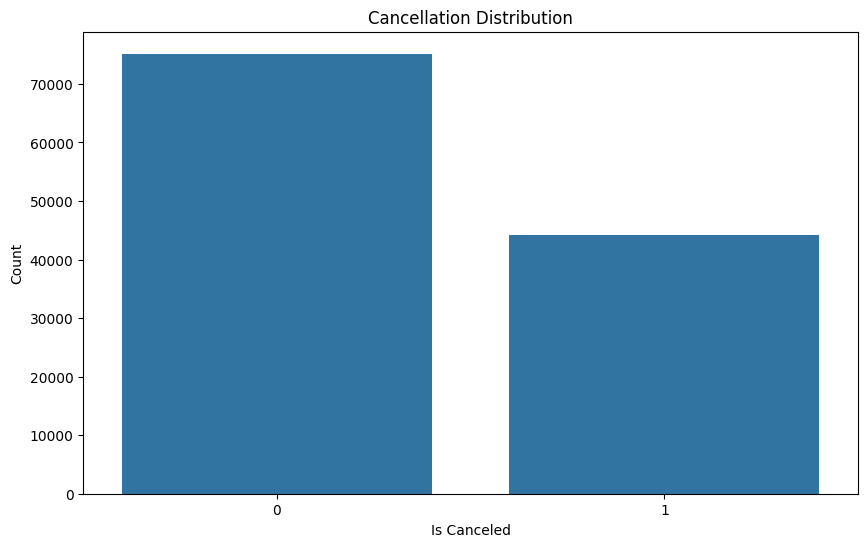

In [ ]:
cancellation_rate = data['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=data)
plt.title('Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.show()

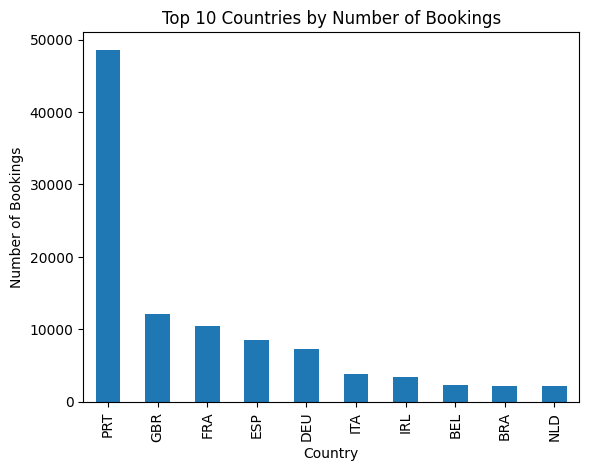

In [ ]:
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

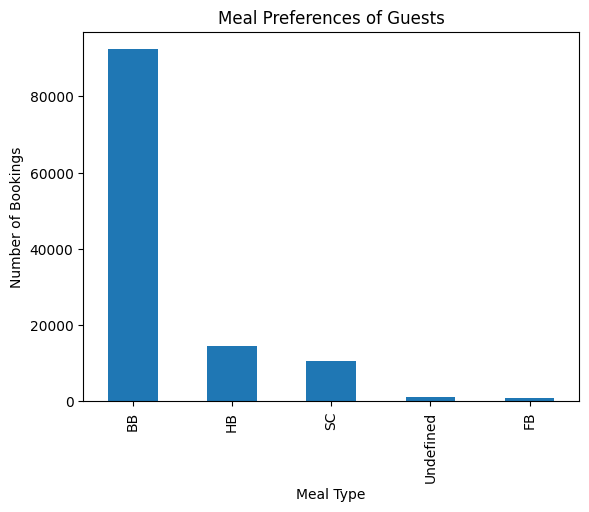

In [ ]:
meal_preference = data['meal'].value_counts()
meal_preference.plot(kind='bar', title='Meal Preferences of Guests')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.show()

In [ ]:
print("Key Insights:")
print("- Most bookings are made in certain peak months, which can be seen in the 'Bookings by Month' plot.")
print("- The Average Daily Rate (ADR) tends to vary with the length of stay, as shown in the 'ADR by Length of Stay' plot.")
print("- Different market segments and customer types have varying average numbers of special requests, as illustrated in the respective bar charts.")


Key Insights:
- Most bookings are made in certain peak months, which can be seen in the 'Bookings by Month' plot.
- The Average Daily Rate (ADR) tends to vary with the length of stay, as shown in the 'ADR by Length of Stay' plot.
- Different market segments and customer types have varying average numbers of special requests, as illustrated in the respective bar charts.
- The average lead time for bookings can help in planning marketing strategies.
- Understanding cancellation patterns can aid in improving booking policies.
- Analysis of booking changes can provide insights into guest behavior.
- Distribution of customers by country highlights geographical diversity.
- Meal preferences of guests can help in menu planning and marketing.
